<h2><center><font color='red'><b> Proyecto Final<h2>
<center><font size=7 color='Navy'><b>NLP: Clasificación de tweets <center><h1>



<font size=6 color='steelblue'><center><b> Exploratory Data Analysis
    

In [1]:
from pylab import *
import pandas as pd
import seaborn as sns
import re

<font size=5 color='navy'><b> Empecemos viendo el tamaño y las características de ambos conjuntos de datos.
    

In [2]:
train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
test_df = pd.read_csv('Corona_NLP_test.csv', encoding='latin1')

In [3]:
print("Shape of Train DataFrame: ", train_df.shape)
train_df.head()

Shape of Train DataFrame:  (41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
print("Shape of Test DataFrame: ", test_df.shape)
test_df.head()

Shape of Test DataFrame:  (3798, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


<font size=5 color='navy'><b> Vemos que el 'Dataset' se compone de seis columnas, las primeras dos de carácter numérico 'int' y las demás son del tipo 'object'. Tanto 'UserName' como 'ScreenName' son seriales numéricos que codifican los usuarios que emitieron el 'tweet'. 'Location' corresponde a la ubicación desde donde fue emitido, 'TweetAt' corresponde a la fecha de emisión, 'OriginalTweet' al contenidio propiamente del texto y 'Sentiment' es una categoría agregada manualmente que clasifica los 'tweets' en cinco categorías: positivo, negativo, neutro, extremadamente negativo y extremadamente positivo. 

In [7]:
print('Sentiment values: ', train_df.Sentiment.unique())

Sentiment values:  ['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


<font size=5 color='navy'><b> Por simplicidad de análisis, eliminamos las columnas 'UserName' y 'ScreenName', y reducimos el dominio de Sentimientos a tres valores: 'Positive', 'Negative' y 'Neutral'.

In [8]:
# Reduce sentiments to 3 values
sentiment_dic = {'Extremely Negative': 'Negative', 'Extremely Positive': 'Positive'}
train_df['Sentiment'] = train_df['Sentiment'].map(lambda x: sentiment_dic[x] if x in sentiment_dic.keys() else x)
test_df['Sentiment'] = test_df['Sentiment'].map(lambda x: sentiment_dic[x] if x in sentiment_dic.keys() else x)
# Drop columns 'UserName' and 'ScreenName'
train_df = train_df.drop(['UserName','ScreenName'], axis=1)
test_df = test_df.drop(['UserName','ScreenName'], axis=1)
train_df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative


<font size=5 color='navy'><b> Empezamos el análisis graficando la cantidad de 'tweets' por cada sentimiento para ambos conjuntos.

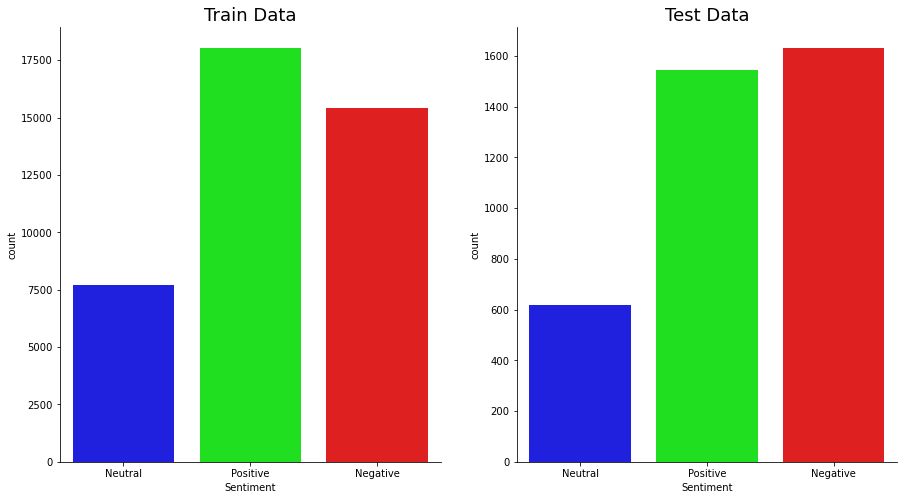

In [9]:
#Plot number of tweet per sentiment on both sets
order=list(train_df.Sentiment.unique())
colors = {order[0]:'blue', order[1]:'lime',order[2]:'red'}
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.countplot(data=train_df,x='Sentiment', order=order, palette=colors)
plt.title('Train Data', fontsize=18)
ax = fig.add_subplot(122)
sns.countplot(data=test_df,x='Sentiment', order=order, palette=colors)
plt.title('Test Data',fontsize=18)
sns.despine() 

<font size=5 color='navy'><b> Notamos una proporción similar de 'tweets' respecto de los sentimientos en ambos conjuntos, lo cual es importante para no sesgar la red neuronal.

<font size=5 color='navy'><b> Luego, graficamos respecto del lugar desde donde se emitieron.

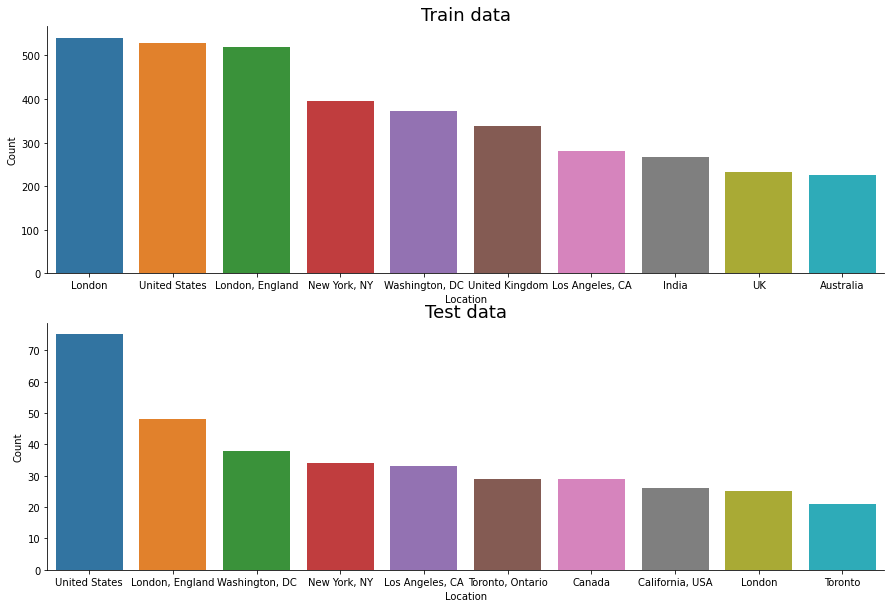

In [9]:
# DataFrame grouped by location and limited to 10 places 
loc_train_df = train_df.groupby('Location', as_index=False).count().sort_values('Sentiment', ascending=False).head(10)
loc_test_df = test_df.groupby('Location', as_index=False).count().sort_values('Sentiment', ascending=False).head(10)

#Plots from both data sets
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(211)
sns.barplot(data=loc_train_df,x='Location',y='Sentiment')
plt.title('Train data', fontsize=18)
plt.ylabel('Count')
ax=fig.add_subplot(212)
sns.barplot(data=loc_test_df,x='Location',y='Sentiment')
plt.title('Test data', fontsize=18)
plt.ylabel('Count')
sns.despine()

<font size=5 color='navy'><b> Comparamos las cantidad de 'tweets' respecto de la fecha de emisión.

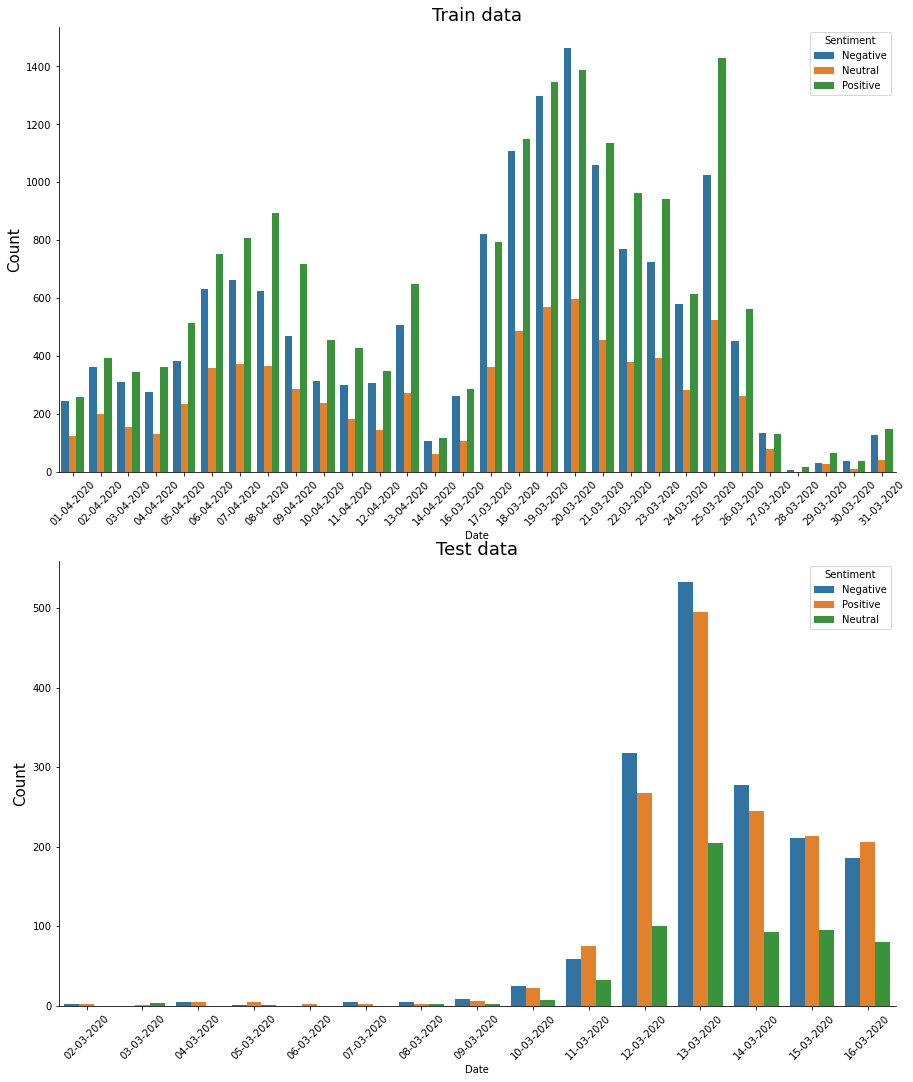

In [12]:
# Dataframe of tweets groped by date
date_train_df=train_df.groupby(['TweetAt','Sentiment'], as_index=False).count()
date_test_df=test_df.groupby(['TweetAt','Sentiment'], as_index=False).count()

#Plots
fig = plt.figure(figsize=(15,18))
ax = fig.add_subplot(211)
sns.barplot(data=date_train_df, x = 'TweetAt', y='OriginalTweet', hue = 'Sentiment' )
plt.title('Train data', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Date')

ax = fig.add_subplot(212)
sns.barplot(data=date_test_df, x = 'TweetAt', y='OriginalTweet', hue = 'Sentiment' )
plt.title('Test data', fontsize=18)         
plt.ylabel('Count', fontsize=15)
plt.xlabel('Date')
plt.xticks(rotation=45)
sns.despine()

<font size=5 color='navy'><b> Notamos que hay una desproporción en cuanto a la distribución de los 'tweets' en lo concerniente con la fecha, sin embargo esto no afecta el resultado de nuestra red neuronal.

<font size=5 color='navy'><b> Ahora, comparamos la longitud promedio de los 'tweets' por cada sentimiento.

In [13]:
# Employ the length function for each tweet and add the value as the 'tweet_length' column

train_df['tweet_length'] = train_df['OriginalTweet'].apply(lambda x:len(x))
test_df['tweet_length'] = test_df['OriginalTweet'].apply(lambda x:len(x))
train_df.head()

,Location,TweetAt,OriginalTweet,Sentiment,tweet_length
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,310


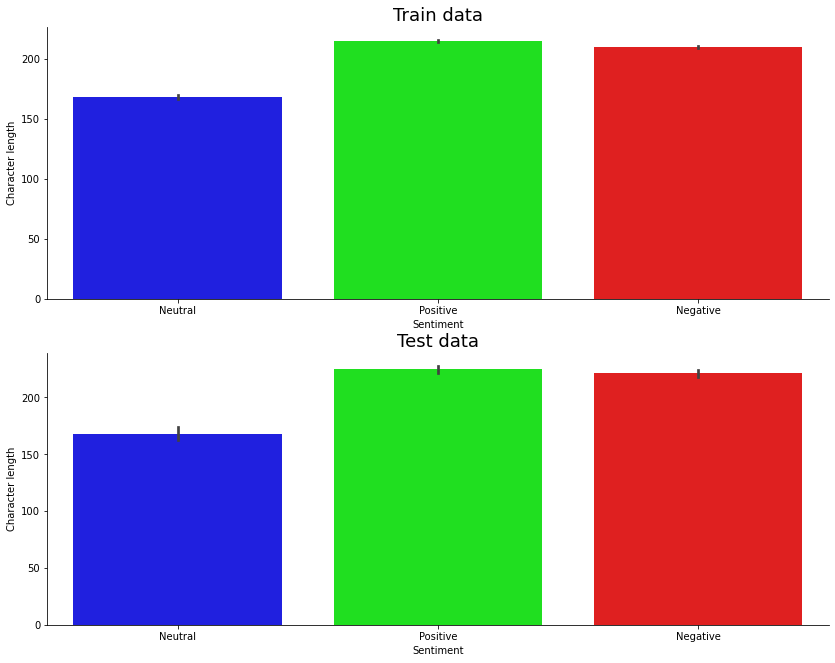

In [14]:
#Graph the average tweet length inrelation to the sentiment
fig = plt.figure(figsize=(14,11))
ax = fig.add_subplot(211)
sns.barplot(data = train_df, x='Sentiment', y='tweet_length', palette=colors, order=order)
plt.title('Train data', fontsize=18)
plt.ylabel('Character length')
ax1 = fig.add_subplot(212)
sns.barplot(data = test_df, x='Sentiment', y='tweet_length', palette=colors, order=order)
plt.title('Test data', fontsize=18)
plt.ylabel('Character length')
sns.despine()

<font size=5 color='navy'><b> Y luego la longitud de las palabras por sentimiento.

In [15]:
# Creat afunction that count the number of words and appended as the column 'WordCount' 

def word_count(tweet):
    dummy_list = re.split(r"[ @#]", tweet)
    count = len(dummy_list)
    return count

train_df['WordCount'] = train_df['OriginalTweet'].apply(word_count)
test_df['WordCount'] = test_df['OriginalTweet'].apply(word_count)

In [16]:
train_df.head()

,Location,TweetAt,OriginalTweet,Sentiment,tweet_length,WordCount
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,11
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,14
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,47
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,310,44


In [17]:
test_df.head()

,Location,TweetAt,OriginalTweet,Sentiment,tweet_length,WordCount
0,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative,228,24
1,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,33
2,NaN,02-03-2020,Find out how you can protect yourself and love...,Positive,73,14
3,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,46
4,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,41


In [18]:
#Create a funtion that plots an histogram of the number of words with respect to the sentiment

def word_count_hist(df):
    fig =plt.figure(figsize=(17,5))
    for i,sentiment in enumerate(train_df.Sentiment.unique()):
        plot_df = df[df.Sentiment==sentiment]
        ax = fig.add_subplot(1,5,i+1)
        sns.histplot(plot_df,x='WordCount', color=list(colors.values())[i])
        plt.title(sentiment)
        plt.xlabel('Number of words')


Histograma de la cantidad de palabras por cada sentimiento del conjunto "Train data"


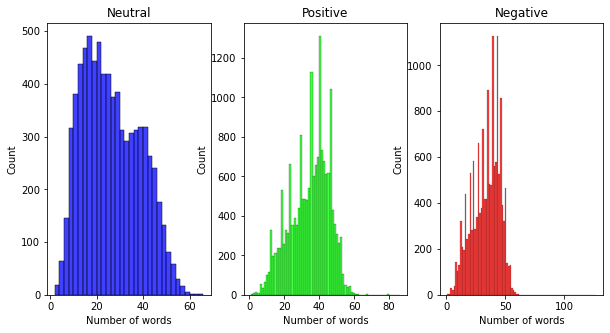

In [23]:
print('Histograma de la cantidad de palabras por cada sentimiento del conjunto "Train data"')
word_count_hist(train_df)

Histograma de la cantidad de palabras por cada sentimiento del conjunto "Test data"


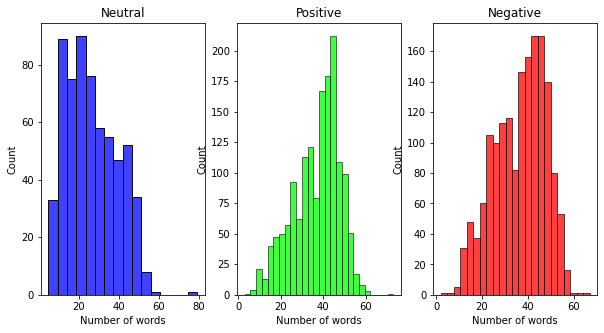

In [24]:
print('Histograma de la cantidad de palabras por cada sentimiento del conjunto "Test data"')
word_count_hist(test_df)

In [25]:
# Build a function that plots the tweet length regarding the sentiment
def plot_tweet_length(df):
    fig =plt.figure(figsize=(17,5))
    for i,sentiment in enumerate(train_df.Sentiment.unique()):
        plot_df = df[df.Sentiment==sentiment]
        ax = fig.add_subplot(1,5,i+1)
        sns.histplot(plot_df,x='tweet_length', color=list(colors.values())[i])
        plt.title(sentiment)
        plt.xlabel('Tweet length')

Histograma de la longitud de los "tweets" por cada sentimiento del conjunto "Train data"


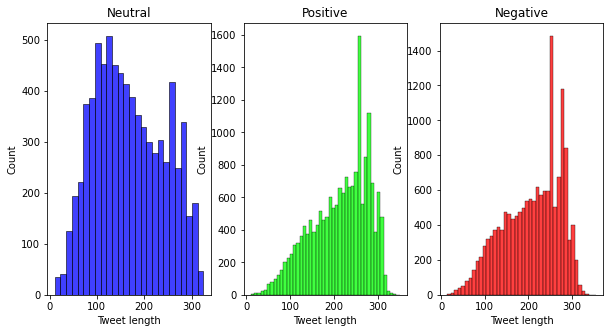

In [27]:
print('Histograma de la longitud de los "tweets" por cada sentimiento del conjunto "Train data"')
plot_tweet_length(train_df)

Histograma de la longitud de los "tweets" por cada sentimiento del conjunto "Test data"


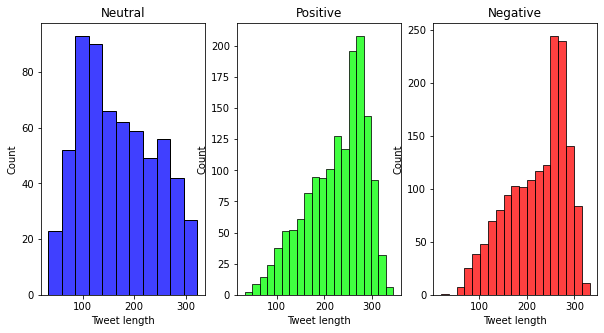

In [28]:
print('Histograma de la longitud de los "tweets" por cada sentimiento del conjunto "Test data"')
plot_tweet_length(test_df)

<font size=6 color='Steelblue'> <center><b> Data Cleaning and Preprocessing

In [29]:
#!pip install nltk
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import one_hot
stopwords = stopwords.words('english')

2022-06-06 15:06:34.669845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-06 15:06:34.669914: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<font size=5 color='navy'><b> Ahora, para empezar con la limpieza de los datos, nos deshacemos de las columnas que no nos interesan.

In [30]:
# Reduce data sets
train_df = train_df[['OriginalTweet','Sentiment']]
train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


In [31]:
test_df = test_df[['OriginalTweet','Sentiment']]
test_df.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


<font size=5 color='navy'><b> Creamos un 'wordcloud' para visualizar cuáles son las palabras que más se repiten de acuerdo a cada sentimiento.

In [7]:
# Define a function that plot a wordcloud for each sentiment 
# depending on the data set and the column to extract the text 
def create_wordcloud(df,Column):
    def get_df_name(df):
        name =[x for x in globals() if globals()[x] is df][0]
        return name
    DF= get_df_name(df)
    cmap=['winter','summer','autumn']
    column = str(Column)
    for i,sentiment in enumerate(train_df['Sentiment'].unique()):
        word_cloud = WordCloud(background_color='black',colormap=cmap[i])
        #fig = plt.figure(figsize=(14,9))
        words=[]
        for _,row in train_df.iterrows():
            if row['Sentiment']==sentiment:
                words.append(row[column].split())
        word_cloud.generate(str(words))
        #plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis('off')
        word_cloud.to_file(DF+'_'+str(sentiment)+'_'+column+'.png')
        #plt.show()
    return None   


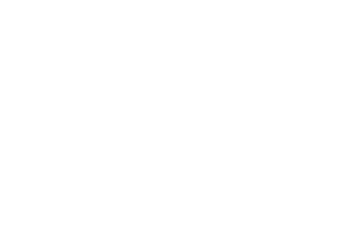

In [38]:
create_wordcloud(train_df,'OriginalTweet')        

<div style="float:left">
    <h3><center><font color='Crimson'> Negative</font></center></h3>
    <img src="train_df_Negative_OriginalTweet.png" width="400px" height="400px">
 </div>
<div style="float:left">
    <h3><center><font color='blue'> Neutral</font></center></h3>
    <img src="train_df_Neutral_OriginalTweet.png" width="400px" height="400px">
</div>

<div style="float:left">
    <h3 ><center><font color='lime'><b> Positive</b></font></center></h3>
    <img src="train_df_Positive_OriginalTweet.png" width="400px" height="400px">
</div>

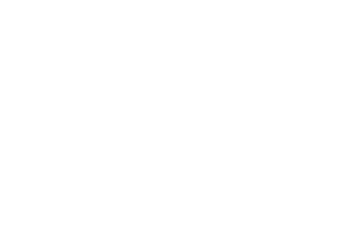

In [39]:
create_wordcloud(test_df,'OriginalTweet')

<div style="float:left">
    <h3><center><font color='Crimson'> Negative</font></center></h3>
    <img src="test_df_Negative_OriginalTweet.png" width="400px" height="400px">
 </div>
<div style="float:left">
    <h3><center><font color='blue'> Neutral</font></center></h3>
    <img src="test_df_Neutral_OriginalTweet.png" width="400px" height="400px">
</div>

<div style="float:left">
    <h3 ><center><font color='lime'><b> Positive</b></font></center></h3>
    <img src="test_df_Positive_OriginalTweet.png" width="400px" height="400px">
</div>

<font size=5 color='navy'><b> Notamos que muchas de las palabras hacen referencia a 'URLs' o no aportan nada, como preposiciones y artículos, por lo que limpiaremos los 'tweets' de estas palabras y de los signos de puntuación.

In [8]:
#Build a function that clean the data of noice
def word_clean(tweet):
    #change to lower case
    tweet = tweet.lower()
    #remove mentions
    clean_tweet = re.sub(r'@\w+',' ', tweet)       
    #remove urls
    clean_tweet = re.sub(r'http\S+',' ', clean_tweet)
    #remove html
    clean_tweet = re.sub(r"<.*?>", " ", clean_tweet)
    #remove email
    clean_tweet = re.sub('\S@\S+',' ', clean_tweet)
    #replace ',' or '.' with a blank space
    clean_tweet = re.sub(r'[.]|,',' ', clean_tweet)
    #remove punctuation
    clean_tweet = "".join(char for char in clean_tweet if char not in punctuation)  
    #remove all special characters
    clean_tweet = re.sub('[^\w\s]|\d+',' ',clean_tweet)
    #remove any blank spaces left
    clean_tweet = re.sub(r"\s+"," ",clean_tweet).strip()
    #make a list of every word
    clean_tweet = clean_tweet.split()
    #remove common words
    clean_tweet = [word for word in clean_tweet if word not in stopwords]
    clean_tweet = " ".join(clean_tweet)
    return clean_tweet

In [9]:
train_df['clean_tweet'] = train_df['OriginalTweet'].apply(word_clean)
train_df.head(10)

,OriginalTweet,Sentiment,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...
4,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid outbreak im paranoi...
5,As news of the regionÂs first confirmed COVID...,Positive,news regionâ first confirmed covid case came s...
6,Cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insights covid p...
7,Was at the supermarket today. Didn't buy toile...,Neutral,supermarket today didnt buy toilet paper rebel...
8,Due to COVID-19 our retail store and classroom...,Positive,due covid retail store classroom atlanta open ...
9,"For corona prevention,we should stop to buy th...",Negative,corona prevention stop buy things cash use onl...


In [10]:
test_df['clean_tweet'] = test_df['OriginalTweet'].apply(word_clean)
test_df.head(10)

,OriginalTweet,Sentiment,clean_tweet
0,TRENDING: New Yorkers encounter empty supermar...,Negative,trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,couldnt find hand sanitizer fred meyer turned ...
2,Find out how you can protect yourself and love...,Positive,find protect loved ones coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city anxious shopper...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...
5,Do you remember the last time you paid $2.99 a...,Neutral,remember last time paid gallon regular gas los...
6,Voting in the age of #coronavirus = hand sanit...,Positive,voting age coronavirus hand sanitizer supertue...
7,"@DrTedros ""We canÂt stop #COVID19 without pro...",Neutral,canâ stop covid without protecting healthworke...
8,HI TWITTER! I am a pharmacist. I sell hand san...,Negative,hi twitter pharmacist sell hand sanitizer livi...
9,Anyone been in a supermarket over the last few...,Positive,anyone supermarket last days went normal shop ...


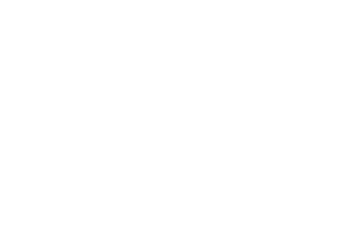

In [43]:
create_wordcloud(train_df,'clean_tweet')


<div style="float:left">
    <h3><center><font color='Crimson'> Negative</font></center></h3>
    <img src="train_df_Negative_clean_tweet.png" width="400px" height="400px">
 </div>
<div style="float:left">
    <h3><center><font color='blue'> Neutral</font></center></h3>
    <img src="train_df_Neutral_clean_tweet.png" width="400px" height="400px">
</div>

<div style="float:left">
    <h3 ><center><font color='lime'><b> Positive</b></font></center></h3>
    <img src="train_df_Positive_clean_tweet.png" width="400px" height="400px">
</div>

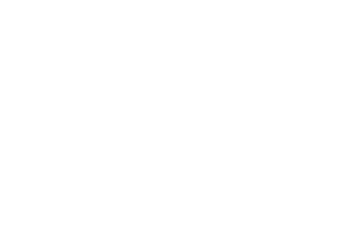

In [44]:
create_wordcloud(test_df,'clean_tweet')


<div style="float:left">
    <h3><center><font color='crimson'> Negative</font></center></h3>
    <img src="test_df_Negative_clean_tweet.png" width="400px" height="400px">
 </div>
<div style="float:left">
    <h3><center><font color='blue'> Neutral</font></center></h3>
    <img src="test_df_Neutral_clean_tweet.png" width="400px" height="400px">
</div>

<div style="float:left">
    <h3 ><center><font color='lime'><b> Positive</b></font></center></h3>
    <img src="test_df_Positive_clean_tweet.png" width="400px" height="400px">
</div>

<font size=5 color='navy'><b>  Una vez limpiados los 'tweets', codificamos los sentimientos.

In [11]:
# Map the sentiment string values into numeric values
mapping_dic = {sentiment:i for i,sentiment in enumerate(train_df.Sentiment.unique())}
mapping_dic

{'Negative': 2, 'Neutral': 0, 'Positive': 1}

In [12]:
train_df['Sentiment coded'] = train_df['Sentiment'].map(lambda x: mapping_dic[x])
train_df.sample(10)

,OriginalTweet,Sentiment,clean_tweet,Sentiment coded
21974,Just got a MPC touch for two hundo. COVID-19 p...,Neutral,got mpc touch two hundo covid prices,0
34466,You too can help the Lagos Food Bank meet the ...,Positive,help lagos food bank meet increased demand foo...,1
37602,PSA Wash hands Wash hands Make sure you lather...,Negative,psa wash hands wash hands make sure lather soa...,2
35030,i just spent 50 dollars at the grocery store a...,Neutral,spent dollars grocery store liquor store right,0
24234,Me and another dude rollinÂ up to Walgreens t...,Positive,another dude rollinâ walgreens see toilet pape...,1
14777,@BorisJohnson @alexburghart How the hell do yo...,Negative,hell propose people family people help shoppin...,2
22209,What I see is complete idiots going through li...,Negative,see complete idiots going life blind clue scie...,2
26548,This is how IÂm going to do my wife when she ...,Neutral,iâ going wife comes back store covid pandemic,0
32756,"Hundreds of lawmakers across the country, incl...",Positive,hundreds lawmakers across country including md...,1
230,@ASDA @Tesco @Morrisons @sainsburys donÂt you...,Neutral,donâ think itâ time reduce minimum online shop...,0


In [13]:
test_df['Sentiment coded'] = test_df['Sentiment'].map(lambda x: mapping_dic[x])
test_df.sample(10)

,OriginalTweet,Sentiment,clean_tweet,Sentiment coded
1264,Show me where the eggs are. That's all I need ...,Neutral,show eggs thats need today small grocery store...,0
3063,When your local grocery store turns into an MM...,Negative,local grocery store turns mma ring remember gr...,2
1680,On the bright side during this #Covid_19 \r\r\...,Positive,bright side covid time spend beloved ones work...,1
3446,"Retail employees are at a high risk, any store...",Negative,retail employees high risk store close due ris...,2
1927,"While I don't like all of Amazon's choices, to...",Positive,dont like amazons choices today learned toilet...,1
2907,One grocery store in Helsinki has appealed to ...,Positive,one grocery store helsinki appealed customers ...,1
2226,IÂm about screwed atm with #Covid_19 as Norwa...,Negative,iâ screwed atm covid norwayâ something lockdow...,2
12,Panic food buying in Germany due to #coronavir...,Negative,panic food buying germany due coronavirus begu...,2
2121,Possible #Covid_19 impact on food systems in d...,Positive,possible covid impact food systems developing ...,1
3409,"Unsurprisingly, ecommerce is reportedly gettin...",Positive,unsurprisingly ecommerce reportedly getting bi...,1


<font size=5 color='navy'><b> Ya con los datos limpios y codificados, procedemos a crear nuestros conjuntos 'x' y 'target'.

In [14]:
# Define our independent variable and the target
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: x.split())
test_df['clean_tweet'] = test_df['clean_tweet'].apply(lambda x: x.split())
X_train, y_train = train_df['clean_tweet'], train_df['Sentiment coded']
X_test, y_test = test_df['clean_tweet'], test_df['Sentiment coded']

In [15]:
print("'X_train' data:\n{}\n".format(X_train[5:10]))
print("'Y_train' data:\n{}".format(y_train[5:10]))

'X_train' data:
5    [news, regionâ, first, confirmed, covid, case,...
6    [cashier, grocery, store, sharing, insights, c...
7    [supermarket, today, didnt, buy, toilet, paper...
8    [due, covid, retail, store, classroom, atlanta...
9    [corona, prevention, stop, buy, things, cash, ...
Name: clean_tweet, dtype: object

'Y_train' data:
5    1
6    1
7    0
8    1
9    2
Name: Sentiment coded, dtype: int64


<font size=5 color='navy'><b> 'Tokenizamos' los 'tweets'.

In [16]:
# Tokenize the tweet
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
vocab_length = len(tokenizer.word_index) + 1
print("Vocabulary length: ",vocab_length)

Vocabulary length:  47448


In [17]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [19]:
max_word_count = 0
word_count = []

for encoded_tweet in X_train:
    word_count.append(len(encoded_tweet))
    if len(encoded_tweet) > max_word_count:
        max_word_count = len(encoded_tweet)
print("Maximum number of words in one tweet: " + str(max_word_count) + " words")

Maximum number of words in one tweet: 48 words


<font size=5 color='navy'><b> Ajustamos cada palabra para que tengan la misma dimensión mediante el 'padding'.

In [20]:
# Apply padding to the sequences
X_train = pad_sequences(X_train, maxlen = max_word_count, padding='post')
X_test = pad_sequences(X_test, maxlen = max_word_count, padding='post')

In [21]:
print("X_train: \n {}\n".format(X_train[10]))
print("X_test: \n {}".format(X_test[10]))

X_train: 
 [  360  2675  3935   125   331   753  1588   170   574  2016   452    73
   244  2963  5302   702     6 10582    57     2  5589     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]

X_test: 
 [  204  1374 17640 10173   130     4   162   149 45102  4716   455  2447
     1 22285     2 16332 18352     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]


<font size=5 color='navy'><b> Y aplicamos 'one-hot-encoding' a nuestro 'target'.

In [22]:
# Apply one-hot-encoding to the sentiment 
Y_train = one_hot(indices=y_train, depth=3)
Y_test = one_hot(indices=y_test, depth=3)

In [23]:
print('Y_train:\n{}'.format(Y_train[:10]))
#print('Y_test:\n {}\n'.format(y_test[:5], Y_test[:5]))

Y_train:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<font size=6 color='Steelblue'><center><b> 
    Model Deployment

<font size=5 color='navy'><b> Utilizaremos una arquitectura LSTM para desarrollar nuestro modelo.

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Embedding, GlobalAvgPool1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorboard.plugins.hparams import api as hp

<font size=5 color='navy'><b> Para determinar los hiperparámetros adecuados nos apoyaremos en la herramienta 'Tensorboard', la cual nos permite aplicar el método de 'Grid Search', mismo que consiste en realizar un breve entrenamiento para cada conjunto de hiperparámeros y una vez hecho lo anterior evalúa la precisión de cada grupo de hiperparámetros en el conjunto de prueba.

In [24]:
# Load tensorboard extension
%load_ext tensorboard

In [25]:
# Clean any previous session
!rm -rf ./logs/

In [26]:
# Define the hyperparameters to set
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([32,64,128]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.1,0.2]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'RMSprop']))
HP_LEARNINGRATE= hp.HParam('learning_rate', hp.Discrete([0.0001,0.001]))
HP_ACTIVATION =  hp.HParam('activation', hp.Discrete(['selu','relu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
      hp.hparams_config(
        hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER, HP_LEARNINGRATE, HP_ACTIVATION],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
      )

In [25]:
# Build the model architecure
def architecture(vocab_length,max_word_count,units,p_drop,activation):
    Model = Sequential()
    Model.add(Embedding(input_dim=vocab_length, input_length = max_word_count, output_dim=32))
    Model.add(LSTM(128, dropout=p_drop))
    Model.add(Dense(units, activation=activation))
    Model.add(Dropout(p_drop))
    Model.add(Dense(units/2, activation=activation))
    Model.add(Dropout(p_drop))
    Model.add(Dense(units/4, activation=activation))
    Model.add(Dropout(p_drop))
    Model.add(Dense(3, activation='softmax'))
    return Model

In [28]:
# Create the 'Grid Search' model for hyperparameters
def train_test_model(hparams):

    model=architecture(vocab_length, max_word_count, 
                       p_drop=hparams[HP_DROPOUT], units=hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION])
    model.compile(
          optimizer=hparams[HP_OPTIMIZER],
          loss='categorical_crossentropy',
          metrics=['accuracy']
      )
    model.optimizer.learning_rate=hparams[HP_LEARNINGRATE]
    model.fit(X_train, Y_train, epochs = 5, batch_size = 32, \
                                validation_split = 0.1, shuffle=True, verbose=0) # Run with 5 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(X_test,Y_test)
    return accuracy

In [29]:
# Record the values found in each run
def training(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [30]:
from collections import OrderedDict, namedtuple
from itertools import product
session_num = 0

#Create the architecture of the RunBulider with all the hyperparamters to test
class RunBuilder():
    @staticmethod
    def get_runs(params):
        Run=namedtuple('Run', params.keys())

        runs=[]

        for v in product(*params.values()):
            runs.append(Run(*v))

        return runs
    
params=OrderedDict(
        num_units=[num_units for num_units in HP_NUM_UNITS.domain.values],
        p_drop=[dropout_rate for dropout_rate in (HP_DROPOUT.domain.values)],
        optim=[optimizer for optimizer in HP_OPTIMIZER.domain.values],
        lr=[lr for lr in HP_LEARNINGRATE.domain.values],
        activation=[activation for activation in HP_ACTIVATION.domain.values]
    )

for run in RunBuilder().get_runs(params):
    hparams = {
          HP_NUM_UNITS: run.num_units,
          HP_DROPOUT: run.p_drop,
          HP_OPTIMIZER: run.optim,
          HP_LEARNINGRATE: run.lr,
          HP_ACTIVATION: run.activation
      }
    run_name = "run-%d" % session_num
    print('--- Starting trial: %s' % run_name)
    print({h.name: hparams[h] for h in hparams})
    training('logs/hparam_tuning/' + run_name, hparams)
    session_num += 1

--- Starting trial: run-0
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'RMSprop', 'learning_rate': 0.0001, 'activation': 'relu'}
119/119 [==============================] - 0s 4ms/step - loss: 0.7945 - accuracy: 0.6353
--- Starting trial: run-1
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'RMSprop', 'learning_rate': 0.0001, 'activation': 'selu'}
119/119 [==============================] - 1s 4ms/step - loss: 0.7376 - accuracy: 0.6785
--- Starting trial: run-2
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'RMSprop', 'learning_rate': 0.001, 'activation': 'relu'}
119/119 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.7209
--- Starting trial: run-3
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'RMSprop', 'learning_rate': 0.001, 'activation': 'selu'}
119/119 [==============================] - 0s 4ms/step - loss: 0.5568 - accuracy: 0.8017
--- Starting trial: run-4
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'adam', 'learning_rate': 0.0001, 'activation': 'r

In [31]:
# Display in thesorboard the statistics and graphs for each run
%tensorboard --logdir logs/hparam_tuning

<IPython.core.display.Javascript object>

<font size=5 color='navy'><b> Vemos que dentro de los parámetros con los que se hizo la prueba, la corrida 31 fue la que mayor efectividad dio, con una precisión del 82.1%, por lo que realizaremos un entrenamiento completo con estos hiperparámetros.

In [26]:
best_model = architecture(vocab_length,max_word_count,units=64,p_drop=0.2,activation='selu')

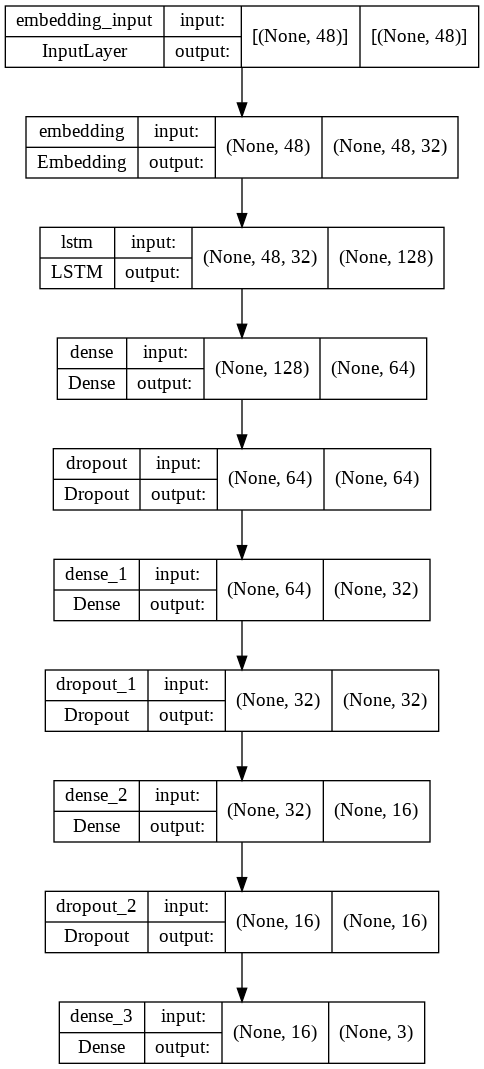

In [27]:
plot_model(best_model, to_file='best_model.png', show_shapes=True, rankdir='TB', show_layer_names=True)

In [28]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 48, 32)            1518336   
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                5

<font size=5 color='navy'><b>
Ahora, seleccionamos el 'learning_rate' como 0.001 y 'Adam' como nuestro optimizador.

In [31]:
learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

<font size=5 color='navy'><b> Definimos la función de pérdida y la métrica.

In [32]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

<font size=5 color='navy'><b> Definimos como 'callback' un 'Early Stopping' que detendrá el entrenamiento si en 5 épocas la 'validation_accuracy' no mejora.

In [33]:
es = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)

<font size=5 color='navy'><b>
Compilamos y realizamos el entrenamiento completo de 30 épocas.

In [ ]:
best_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=5 color='navy'><b> Y ya con todo listo, realizamos un entrenamiento completo.

In [34]:
# Make a complete training with the best hyperparameters found
start_time = time.time()

validation_portion = 0.1
batch_size=64
num_epochs = 30

history = best_model.fit(x=X_train, y=Y_train, epochs=num_epochs, batch_size=batch_size, \
                            validation_split=validation_portion, shuffle=True,
                            callbacks=[es], verbose=1)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/30
579/579 [==============================] - 9s 9ms/step - loss: 0.9586 - accuracy: 0.5044 - val_loss: 0.7806 - val_accuracy: 0.6232
Epoch 2/30
579/579 [==============================] - 5s 8ms/step - loss: 0.5829 - accuracy: 0.7806 - val_loss: 0.4972 - val_accuracy: 0.8231
Epoch 3/30
579/579 [==============================] - 5s 8ms/step - loss: 0.3422 - accuracy: 0.8910 - val_loss: 0.4908 - val_accuracy: 0.8316
Epoch 4/30
579/579 [==============================] - 5s 8ms/step - loss: 0.2454 - accuracy: 0.9269 - val_loss: 0.5440 - val_accuracy: 0.8375
Epoch 5/30
579/579 [==============================] - 5s 8ms/step - loss: 0.1989 - accuracy: 0.9410 - val_loss: 0.6280 - val_accuracy: 0.8154
Epoch 6/30
579/579 [==============================] - 5s 8ms/step - loss: 0.1731 - accuracy: 0.9505 - val_loss: 0.6178 - val_accuracy: 0.8168
Epoch 7/30
579/579 [==============================] - 5s 8ms/step - loss: 0.1491 - accuracy: 0.9570 - val_loss: 0.6816 - val_accuracy: 0.8086
Epoch 

<font size=5 color='navy'><b> Notamos que el entrenamiento se detuvo en la novena época debido al 'EarlyStopping', por lo que el modelo empezaba a tener 'overfitting', graficamos la pérdida y la precisión para constatar lo predicho.

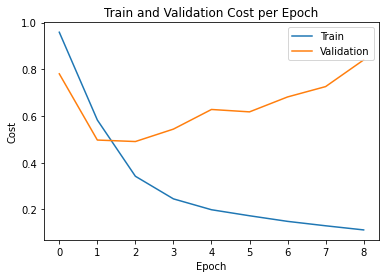

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and Validation Cost per Epoch')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

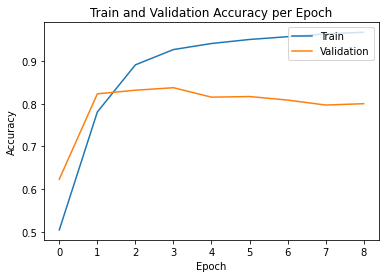

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and Validation Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<font size=5 color='navy'><b> Como lo previmos, el modelo empezaba a sobrentrenarse, no obstante, gracias a que seleccionamos la opción de guardar los pesos obtenidos con la mejor precisión, podemos asumir que tendrá una efectividad de alrededor del 84% con el conjunto de prueba.

<font size=6 color='steelblue'><center><b> Model Evaluation

<font size=5 color='navy'><b> Ahora, realizamos la predicción para el conjunto de prueba y evaluaremos su efectividad mediante distintas métricas.

In [45]:
# Make a prediction for the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predictions = best_model.predict(X_test)
y_hat = predictions.argmax(axis=-1)


array([2, 1, 1, 2, 0])

In [53]:
# Determine the accuracy of the prediction
acc_score = accuracy_score(y_test,y_hat)
print("Accuracy of the model predictions: ", round(acc_score,2))

Accuracy of the model predictions:  0.82


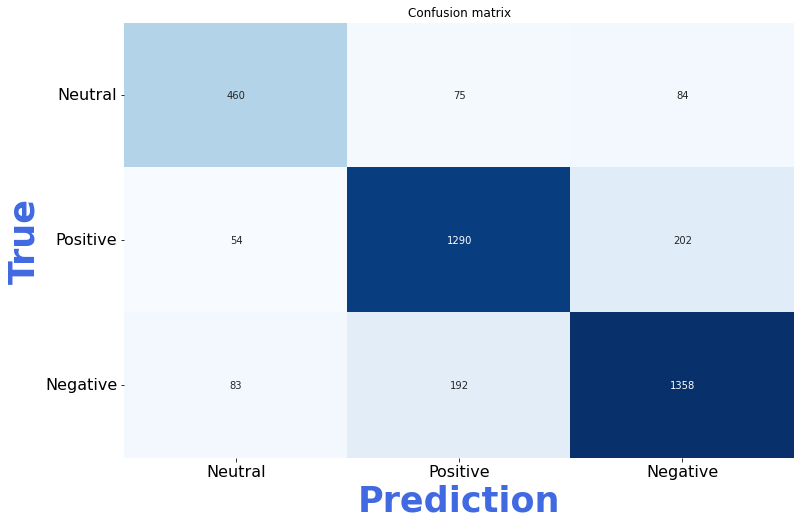

In [51]:
# Build a confussion matrix to visualize more clearly the nature and effectiveness of the prediction
cm = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xticklabels=list(train_df.Sentiment.unique()), yticklabels=list(train_df.Sentiment.unique()), title="Confusion matrix")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("True", color="royalblue", fontsize=35, fontweight=700)
ax.set_xlabel("Prediction", color="royalblue", fontsize=35, fontweight=700)
plt.yticks(rotation=0);

In [1]:
report = classification_report(y_test, y_hat, target_names=list(train_df.Sentiment.unique()), output_dict=True)
df_report = pd.DataFrame(report)[['Neutral','Negative','Positive']].apply(lambda x: round(x,3))
df_report

NameError: ignored